<a href="https://colab.research.google.com/github/berryaesi/CSEL-302-Introduction-to-Intelligent-System/blob/main/0220_Assessment_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **1. Data Loading**

In [ ]:
data = pd.read_csv('hardwareStore.csv')
data.head()

,CATEGORY_ID,CATEGORY_NAME,PRODUCT_ID,PRODUCT_NAME,DESCRIPTION,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,DESCRIPTION - Detail 3,DESCRIPTION - Detail 4,STANDARD_COST,...,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY,WAREHOUSE_NAME,ADDRESS,POSTAL_CODE,CITY,STATE,COUNTRY_NAME
0,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,11,8,50,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,12,9,36,Bombay,1298 Vileparle (E),490231,Bombay,Maharashtra,India
2,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,6,2,97,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
3,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,8,4,67,"Seattle, Washington",2004 Charade Rd,98199,Seattle,Washington,United States of America
4,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,13,6,30,Sydney,12-98 Victoria Street,2901,Sydney,New South Wales,Australia


# **2. Initial Data Analysis**

In [ ]:
HARDWARE = data.groupby('CATEGORY_NAME')['QUANTITY'].sum()

In [ ]:
numberData = ['STANDARD_COST', 'LIST_PRICE', 'QUANTITY']

In [ ]:
data[numberData].mean()

STANDARD_COST    765.520405
LIST_PRICE       950.993327
QUANTITY         107.474820
dtype: float64

In [ ]:
data[numberData].median()

STANDARD_COST    582.02
LIST_PRICE       744.98
QUANTITY          98.00
dtype: float64

In [ ]:
data[numberData].std()

STANDARD_COST    794.252142
LIST_PRICE       991.070482
QUANTITY          68.008413
dtype: float64

In [ ]:
uniqCategoryID = data.groupby('PRODUCT_ID')['PRODUCT_ID'].count()
print(uniqCategoryID)
print(' ')
uniqCategory_Name = data.groupby('CATEGORY_NAME')['CATEGORY_NAME'].count()
print(uniqCategory_Name)

PRODUCT_ID
2      6
3      9
4      9
5      9
6      9
      ..
284    5
285    5
286    5
287    1
288    1
Name: PRODUCT_ID, Length: 208, dtype: int64
 
CATEGORY_NAME
CPU             222
Mother Board    156
Storage         416
Video Card      318
Name: CATEGORY_NAME, dtype: int64


# **3. Category Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

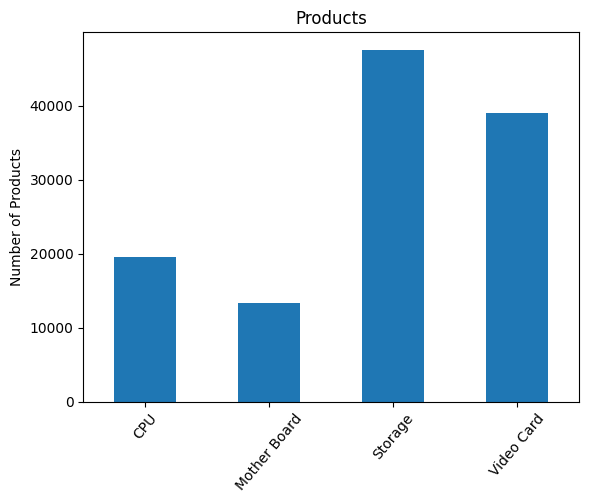

In [ ]:
HARDWARE.plot(kind = 'bar')
plt.xlabel('')
plt.ylabel('Number of Products')
plt.title('Products')
plt.xticks(rotation = 50)
plt.show

The product that has the highest number is Storage.

# **4. Cost and Price Analysis**

In [ ]:
standardCost_ave = data['STANDARD_COST'].mean()
listPrice_ave = data['LIST_PRICE'].mean()

highestStandard_Cost =  data.loc[data['STANDARD_COST'].idxmax(), 'PRODUCT_NAME']
highestList_Price = data.loc[data['LIST_PRICE'].idxmax(), 'PRODUCT_NAME']


# **5. Location Analysis**

In [ ]:
city = data.groupby('CITY')['QUANTITY'].sum()
highestqtt_city = city.idxmax()

state = data.groupby('STATE')['QUANTITY'].sum()
highestqtt_state = state.idxmax()

# **6. Insights and Reporting**

In [ ]:
report = """

Analysis Report

Initial Data Analysis:

Mean:
{}

Median:
{}

Standard Deviation
{}

Category Analysis:
  A bar chart is attached above to visualize the distribution of products across categories.
  The category that has the highest number of product is Storage.

Cost and Price Analysis:
  The Standard Cost average is equal to {}
  The Price List average is equal to {}
  The Product with the Highest Standard Cost is {}
  The Product with the Highest List Price is {}

Location Analysis:
  The City with the highest quantity of products in stock is {}
  The State with the highest quantity of products in stock is {}

""". format(data[numberData].mean(), data[numberData].median(), data[numberData].std(), standardCost_ave, listPrice_ave, highestStandard_Cost, highestList_Price, highestqtt_city, highestqtt_state)
print(report)



Analysis Report

Initial Data Analysis:

Mean:
STANDARD_COST    765.520405
LIST_PRICE       950.993327
QUANTITY         107.474820
dtype: float64

Median:
STANDARD_COST    582.02
LIST_PRICE       744.98
QUANTITY          98.00
dtype: float64

Standard Deviation
STANDARD_COST    794.252142
LIST_PRICE       991.070482
QUANTITY          68.008413
dtype: float64

Category Analysis:
  A bar chart is attached above to visualize the distribution of products across categories.
  The category that has the highest number of product is Storage.

Cost and Price Analysis:
  The Standard Cost average is equal to 765.520404676259
  The Price List average is equal to 950.9933273381293
  The Product with the Highest Standard Cost is Intel SSDPECME040T401
  The Product with the Highest List Price is Intel SSDPECME040T401

Location Analysis:
  The City with the highest quantity of products in stock is South San Francisco
  The State with the highest quantity of products in stock is California




In [ ]:
with open('report.txt', 'w') as f:
  f.write(report)